In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from os.path import join, basename
from skimage.util import img_as_ubyte
import skimage as ski

In [13]:
# Your file paths
DATAROOT = r"E:\Documentos\02_Programming\TFM\Image processing\thesis"

image_files = sorted(glob.glob(join(DATAROOT, '*.jpg')))  # List of file paths for all images
# Read the images
print(f"Number of image files: {len(image_files)}")

Number of image files: 6


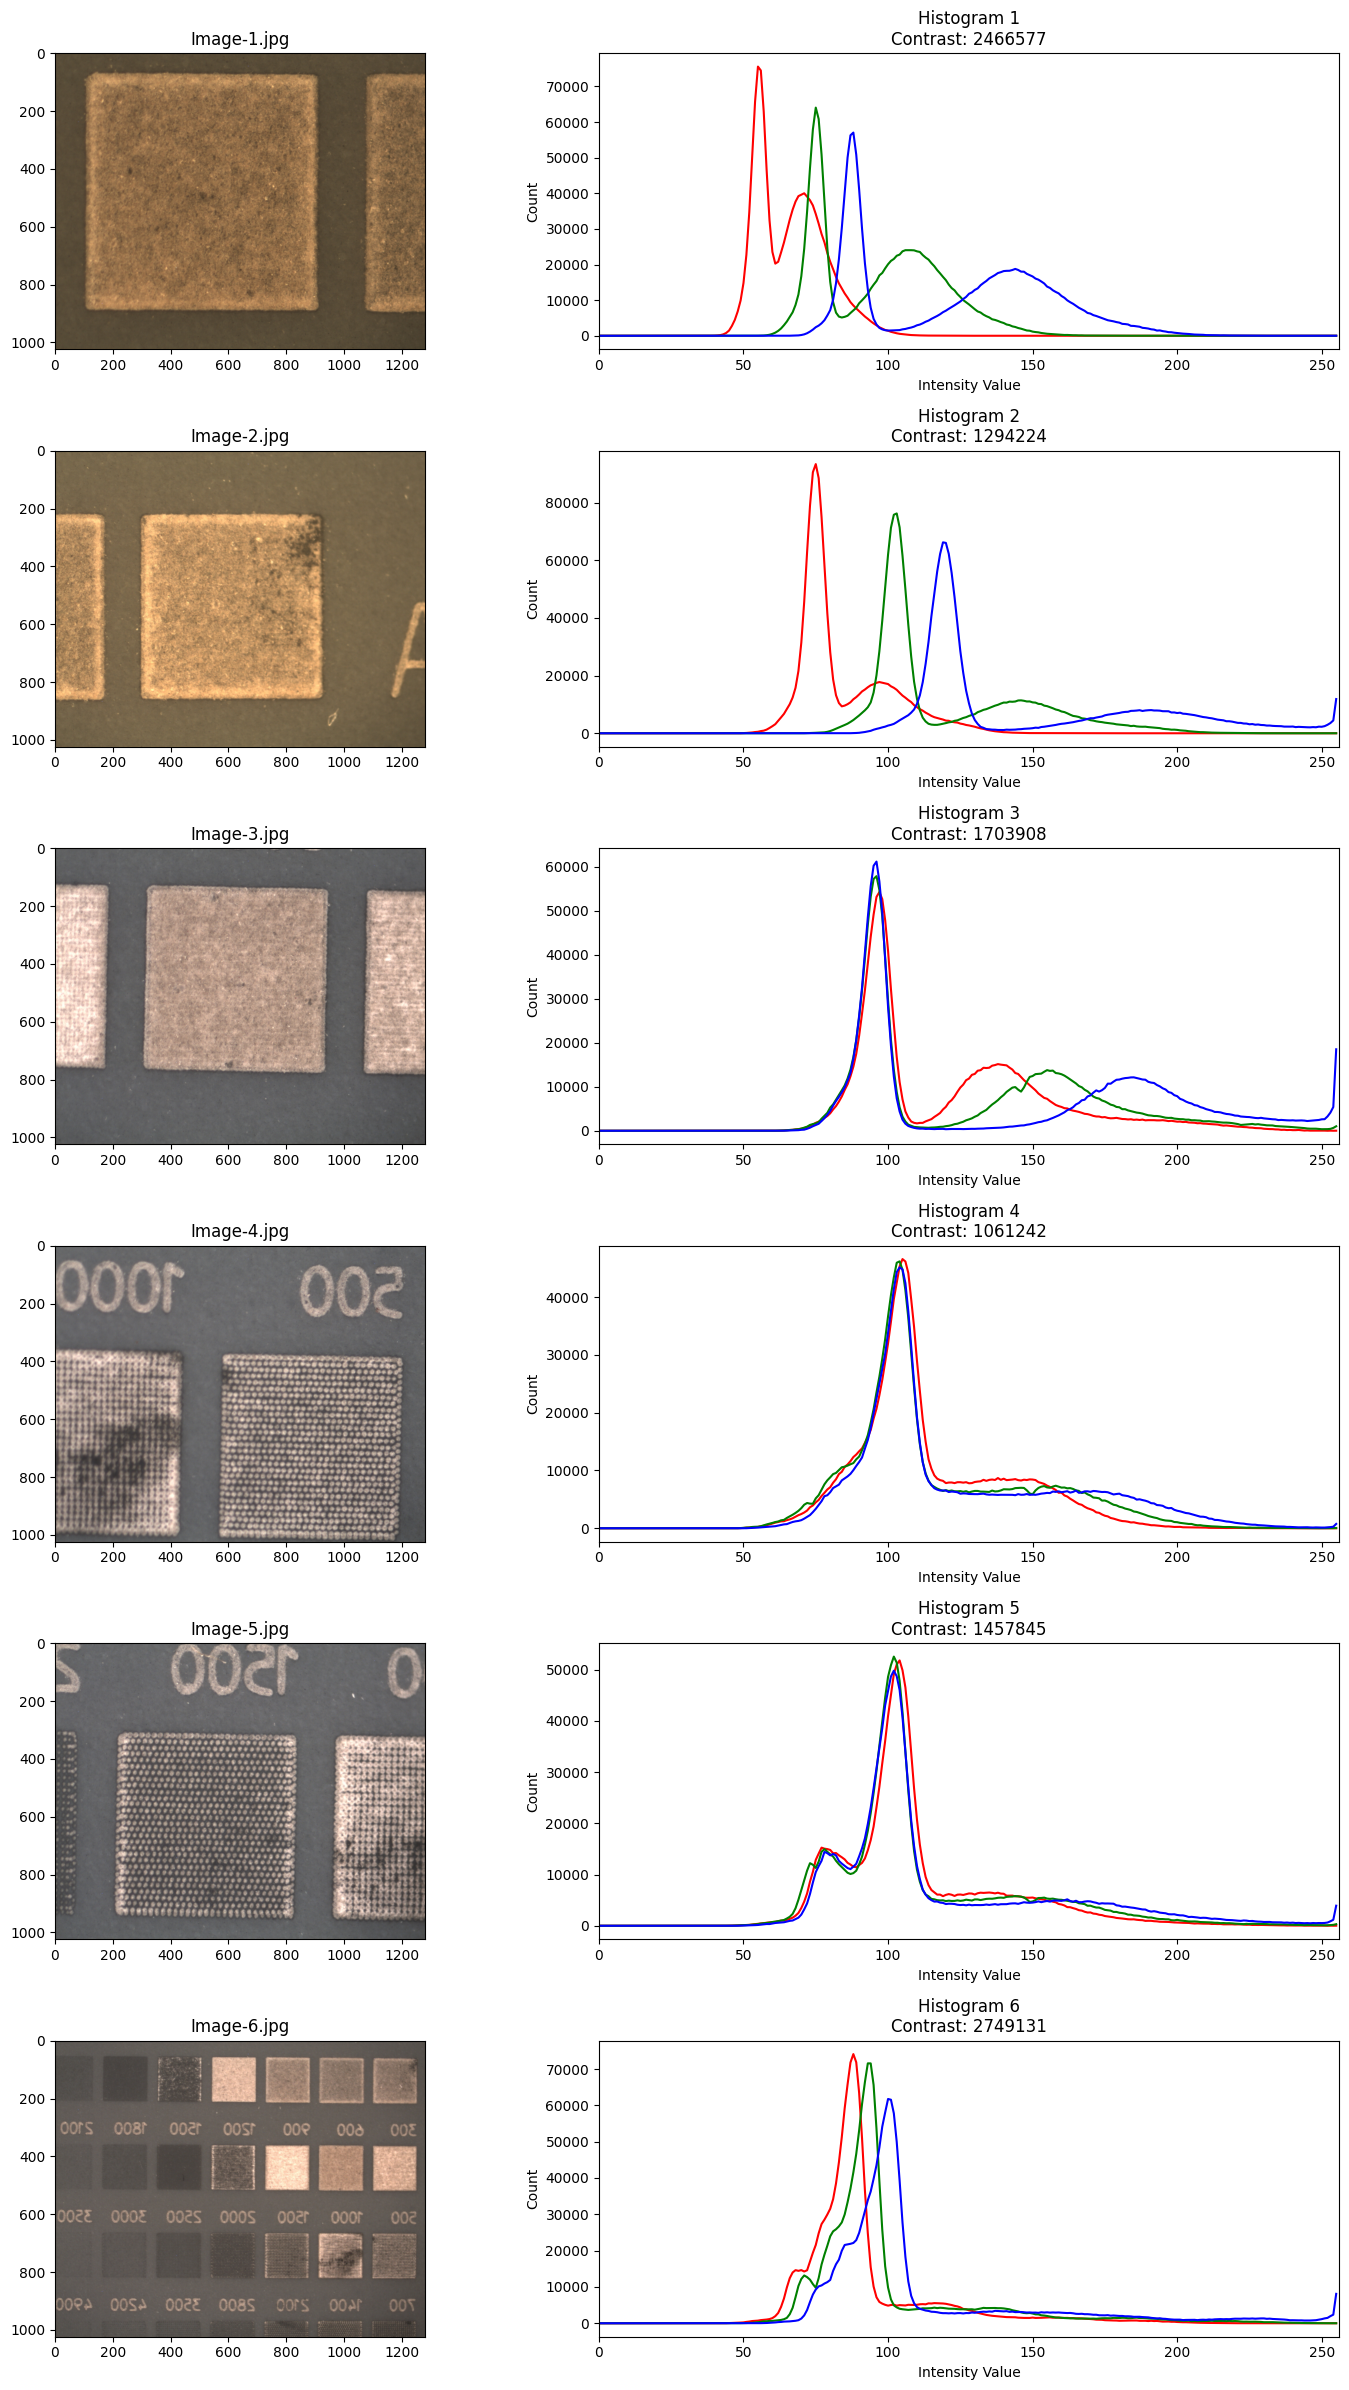

In [14]:
fig, axs = plt.subplots(len(image_files), 2, figsize=(15, 4 * len(image_files)))
# Calculate the histograms and contrast metric, and populate the subplots
for i in range(len(image_files)):
    colors = ("red", "green", "blue")
    img = cv2.imread(image_files[i])
    
    # Display the image
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'{basename(image_files[i])}')

    # Display the histogram
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(img[:, :, channel_id], bins=256, range=(0, 256))
        axs[i, 1].plot(bin_edges[0:-1], histogram, color=color)

    axs[i, 1].set_title(f'Histogram {i+1}\nContrast: {np.sum(img<100)}')
    axs[i, 1].set_xlabel('Intensity Value')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()